# Example Notebook #4 - Options Implied Portfolios and Strategy

In [32]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime as dt
from pandas.tseries.offsets import BDay
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from portfolio_swissknife import portfolio as pf
from portfolio_swissknife import models as rm

In [34]:
securities = ['AAPL', 'MSFT', 'TGT']
pf1 = pf.OptionsPortfolio(securities)
pf1.set_period(('2012-01-01',(dt.today() - BDay(1)).strftime('%Y-%m-%d')))
pf1.get_prices()
pf1.set_discount('^TNX')

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
securities = ['AAPL', 'MSFT', 'TGT']
pcm1 = rm.PricingModel(pf1)
pcm1.set_period(('2012-01-01',(dt.today() - BDay(1)).strftime('%Y-%m-%d')))
pcm1.set_pricing_model('BS', 252)
pcm1.price_option_chain(tenor_periods = 24, K_std_range = 2)

In [39]:
test = pd.DataFrame({'p': pcm1.theoretical_option_chain['TGT']['delta_call'][:,1],
              'K': pcm1.theoretical_option_chain['TGT']['K_range']})

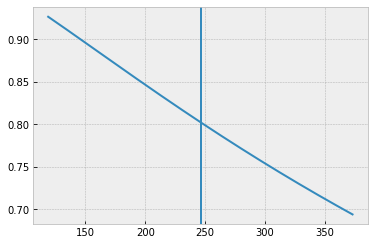

In [40]:
plt.plot(test['K'],test['p'])
plt.axvline(s_0[2])

In [15]:
from yahoo_fin import options

In [16]:
nflx_dates= options.get_expiration_dates("AAPL")
 
info = {}
for date in nflx_dates:
    info[date] = options.get_options_chain("AAPL")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\matus\anaconda3\envs\pf_dev\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-55bf5c3771af>", line 5, in <module>
    info[date] = options.get_options_chain("AAPL")
  File "C:\Users\matus\anaconda3\envs\pf_dev\lib\site-packages\yahoo_fin\options.py", line 42, in get_options_chain
    tables = pd.read_html(requests.get(site, headers=headers).text)
  File "C:\Users\matus\anaconda3\envs\pf_dev\lib\site-packages\requests\api.py", line 76, in get
    return request('get', url, params=params, **kwargs)
  File "C:\Users\matus\anaconda3\envs\pf_dev\lib\site-packages\requests\api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)
  File "C:\Users\matus\anaconda3\envs\pf_dev\lib\site-packages\requests\sessions.py", line 542, in request
    resp = self.send(prep, **send_kwargs)
  File "C:\Users\matus\anacon

TypeError: object of type 'NoneType' has no len()